<a href="https://colab.research.google.com/github/jaidatta71/ML---Berkeley/blob/main/PCA_K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Self-study Colab Activity 6.2: Interpreting the Results of K-Means and PCA




In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers' purchasing and usage behavior with telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd

In [3]:
df = pd.read_csv('drive/MyDrive/colab_activity6_2_PCA and K-Means/data/telco_churn_data.csv')

In [4]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [6]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


### Dropping unnecessary columns

- `Customer ID` is a unique identifier for each customer but not continuous so cannot be used to set as an index and also not useful for PCA.
- `Latitude`, `Longitude`, `City`, `Population`, `ZipCode` are not useful for PCA.
- `Internet Type` is not useful as it is not populated for about 25% of the data.
- `Offer` is not useful as it is not populated for about 50% of the data.
- `Churn Category` and `Churn Reason` are not as useful since we have `Churn Value`. If we need to do a deeper analysis of the reason for Churn, we can use these columns. For now, since we are doing PCA and KMeans across the entire dataset, we can drop these columns.
- `Customer Satisfaction` is not useful as it is not populated for about 75% of the data.
- `Referred a Friend` can be dropped since we have a column `Number of Referrals` which is a better indicator of the same.
- `Dependents` can be dropped since we have a column `Number of Dependents` which is a better indicator of the same.

In [7]:
#drop columns that are not useful for PCA

df_clean = df.drop(['Customer ID', 'Latitude', 'Longitude', 'City', 'Population', 'Zip Code', 'Internet Type', 'Offer', 'Churn Category', 'Churn Reason', 'Customer Satisfaction', 'Referred a Friend', 'Dependents'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Phone Service                      7043 non-null   object 
 3   Avg Monthly Long Distance Charges  7043 non-null   float64
 4   Multiple Lines                     7043 non-null   object 
 5   Internet Service                   7043 non-null   object 
 6   Avg Monthly GB Download            7043 non-null   int64  
 7   Online Security                    7043 non-null   object 
 8   Online Backup                      7043 non-null   object 
 9   Device Protection Plan             7043 non-null   object 
 10  Premium Tech Support               7043 non-null   object 
 11  Streaming TV                       7043 non-null   objec

### Enabling numerical values
Identify attributes that are categorical. Convert categorical text-based values to numeric so they can be used for PCA.

In [8]:
#identify attributes from dataframe that are categorical
categorical = df_clean.select_dtypes(include=['object']).columns

# get distinct values for each categorical attribute
for column in categorical:
    print(column, df_clean[column].unique())

Phone Service ['No' 'Yes']
Multiple Lines ['No' 'Yes']
Internet Service ['Yes' 'No']
Online Security ['No' 'Yes']
Online Backup ['No' 'Yes']
Device Protection Plan ['Yes' 'No']
Premium Tech Support ['No' 'Yes']
Streaming TV ['No' 'Yes']
Streaming Movies ['Yes' 'No']
Streaming Music ['No' 'Yes']
Unlimited Data ['No' 'Yes']
Contract ['Month-to-Month' 'One Year' 'Two Year']
Paperless Billing ['Yes' 'No']
Payment Method ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
Gender ['Male' 'Female']
Under 30 ['No' 'Yes']
Senior Citizen ['Yes' 'No']
Married ['No' 'Yes']


In [9]:
#convert categorical values to numerical values
df_clean['Phone Service'] = df_clean['Phone Service'].map({'No': 1, 'Yes': 2})
df_clean['Multiple Lines'] = df_clean['Multiple Lines'].map({'No': 1, 'Yes': 2})
df_clean['Internet Service'] = df_clean['Internet Service'].map({'No': 1, 'Yes': 2})
df_clean['Online Security'] = df_clean['Online Security'].map({'No': 1, 'Yes': 2})
df_clean['Online Backup'] = df_clean['Online Backup'].map({'No': 1, 'Yes': 2})
df_clean['Device Protection Plan'] = df_clean['Device Protection Plan'].map({'No': 1, 'Yes': 2})
df_clean['Premium Tech Support'] = df_clean['Premium Tech Support'].map({'No': 1, 'Yes': 2})
df_clean['Streaming TV'] = df_clean['Streaming TV'].map({'No': 1, 'Yes': 2})
df_clean['Streaming Movies'] = df_clean['Streaming Movies'].map({'No': 1, 'Yes': 2})
df_clean['Streaming Music'] = df_clean['Streaming Music'].map({'No': 1, 'Yes': 2})
df_clean['Unlimited Data'] = df_clean['Unlimited Data'].map({'No': 1, 'Yes': 2})
df_clean['Contract'] = df_clean['Contract'].map({'Month-to-Month': 1, 'One Year': 2, 'Two Year': 3})
df_clean['Paperless Billing'] = df_clean['Paperless Billing'].map({'No': 1, 'Yes': 2})
df_clean['Payment Method'] = df_clean['Payment Method'].map({'Bank Withdrawal': 1, 'Mailed Check': 2, 'Credit Card': 3})
df_clean['Gender'] = df_clean['Gender'].map({'Female': 1, 'Male': 2})
df_clean['Under 30'] = df_clean['Under 30'].map({'No': 1, 'Yes': 2})
df_clean['Senior Citizen'] = df_clean['Senior Citizen'].map({'No': 1, 'Yes': 2})
df_clean['Married'] = df_clean['Married'].map({'No': 1, 'Yes': 2})

df_clean

,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,...,Gender,Age,Under 30,Senior Citizen,Married,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,0,1,1,0.00,1,2,9,1,1,2,...,2,78,1,2,1,0,1,5433,5,0
1,1,8,2,48.85,2,2,19,1,2,1,...,1,74,1,2,2,1,1,5302,5,0
2,0,18,2,11.33,2,2,57,1,1,1,...,2,71,1,2,1,3,1,3179,1,0
3,1,25,2,19.76,1,2,13,1,2,2,...,1,78,1,2,2,1,1,5337,1,1
4,1,37,2,6.33,2,2,15,1,1,1,...,1,80,1,2,2,1,1,2793,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,72,2,22.77,1,1,0,1,1,1,...,1,30,1,1,1,0,0,5306,0,0
7039,1,24,2,36.05,2,2,24,2,1,2,...,2,38,1,1,2,2,0,2140,2,0
7040,4,72,2,29.66,2,2,59,1,2,2,...,1,30,1,1,2,2,0,5560,2,0
7041,1,11,1,0.00,1,2,17,2,1,1,...,1,32,1,1,2,2,0,2793,0,0


### Data cleanup is complete
Now we have all columns in numeric form and have no null values.

All set to perform PCA.
# Perform Principal Component Analysis

Start by identifying how many features are needed to perform PCA to get a variance of 80% and above.

In [12]:
#Standardize the data
df_scaled = (df_clean - df_clean.mean())/df_clean.std()

#Preparation for PCA
U, sigma, VT = svd(df_scaled)
percent_variance_explained = sigma/sigma.sum()
cumulative_variance_ratio = np.cumsum(sigma)/sigma.sum()

#Identify number of components needed to achieve at least 80% variance
num_of_components_over_80pct_variance = int((np.cumsum(percent_variance_explained) < .8).sum())
print(f"Number of components needed to achieve at least 80% variance: {num_of_components_over_80pct_variance}")

Number of components needed to achieve at least 80% variance: 20


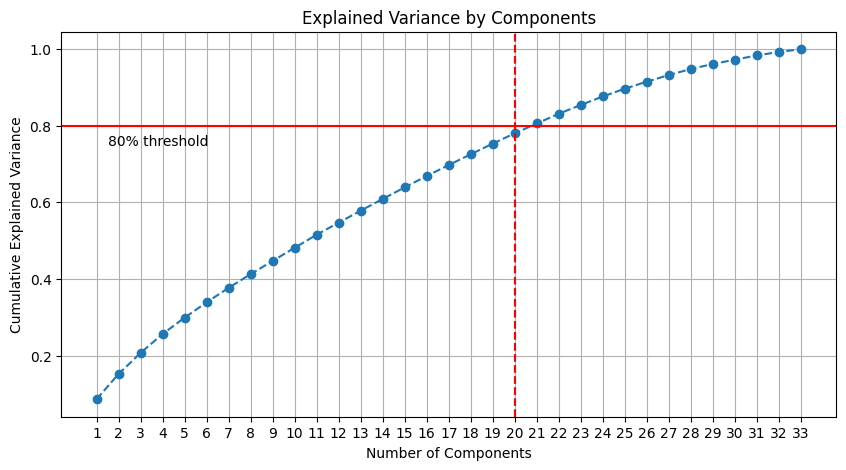

In [13]:
# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.75, '80% threshold')
plt.axvline(x=num_of_components_over_80pct_variance-1, color='r', linestyle='--')
plt.xticks(np.arange(len(cumulative_variance_ratio)), np.arange(1, len(cumulative_variance_ratio)+1))
plt.grid(True)

plt.show()

In [14]:
#Perform PCA with the number of components that achieve at least 80% variance
pca = PCA(n_components = num_of_components_over_80pct_variance)
components = pca.fit_transform(df_scaled)

### Understanding the features that make up the PCA

Identifying the columns that make up the key factors of PCA components.

In [15]:
# The loadings are the components_ attribute of the PCA object, but these need to be scaled by the square root of the eigenvalues (explained_variance_)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame of loadings with rows corresponding to features and columns to components
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=df_clean.columns)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Number of Referrals,0.275484,-0.465443,0.015100,-0.076400,0.519152,0.376608,0.126222,0.024805,0.034871,-0.046388,-0.004651,-0.147692,0.045334,0.030989,-0.129627,-0.232481,0.107797,-0.115256,-0.032624,0.028015
Tenure in Months,0.682606,-0.519138,0.152463,0.001501,0.042854,-0.215055,-0.092351,0.050474,-0.164673,0.082134,-0.085908,-0.042329,0.008292,-0.013887,-0.083949,0.070158,-0.038803,0.130491,0.014372,-0.041989
Phone Service,0.051978,-0.077034,0.288643,0.669985,-0.198639,0.232539,0.060919,-0.066504,0.107680,-0.059373,0.113976,0.032978,0.149588,-0.211573,0.071340,-0.075079,-0.025798,-0.173308,-0.070857,0.117801
Avg Monthly Long Distance Charges,0.094603,-0.101338,0.243207,0.680682,-0.287904,0.285120,-0.001163,0.150947,0.153746,-0.040113,0.070872,-0.013966,-0.247792,0.293621,0.009624,0.003135,0.037109,-0.028133,0.052232,-0.024847
Multiple Lines,0.481721,0.060238,0.262735,0.309566,0.014368,0.054737,-0.054433,-0.156751,-0.099407,0.043090,-0.012236,-0.002659,0.335278,-0.480295,0.043314,0.037198,-0.116993,0.149836,-0.104631,-0.050574
Internet Service,0.584896,0.577860,-0.115226,-0.219725,-0.043706,0.208577,-0.203377,-0.003132,0.085156,-0.022610,0.016876,0.073142,-0.040931,0.020599,0.021270,-0.065056,0.045118,-0.063339,-0.006695,-0.039084
Avg Monthly GB Download,0.404974,0.267146,-0.628656,0.104037,0.082157,0.188256,-0.276181,-0.151262,0.015886,-0.019037,-0.053036,-0.066765,-0.096185,0.058534,0.214185,0.054678,-0.041478,-0.005258,-0.017610,0.010316
Online Security,0.479449,-0.122175,-0.141231,-0.231953,-0.119207,0.042846,-0.327747,0.211066,0.154091,-0.100500,0.139291,0.112007,-0.108057,-0.043212,-0.025658,-0.309942,-0.092684,0.152707,-0.308812,-0.329264
Online Backup,0.569122,0.023707,-0.012770,-0.131018,-0.040895,0.018898,-0.274513,0.041634,0.031975,-0.049791,-0.010068,0.090334,0.098039,-0.008577,-0.177579,0.248992,0.575177,0.135402,0.094743,0.185145
Device Protection Plan,0.616929,0.050707,-0.034611,-0.162732,-0.029457,-0.096227,0.027529,0.048877,0.103073,-0.018410,0.070634,-0.141224,-0.009164,-0.058747,-0.049397,0.072855,-0.152854,-0.264508,0.465876,-0.328354


# Identify the number of clusters (k) to create by:  Please  note PCA components are passed to fit() function . Not the whole DF
1. Identifying the inertias
2. Applying the elbow method and
3. If needed, apply the percent differential for inertias to identify an appropriate number of clusters.

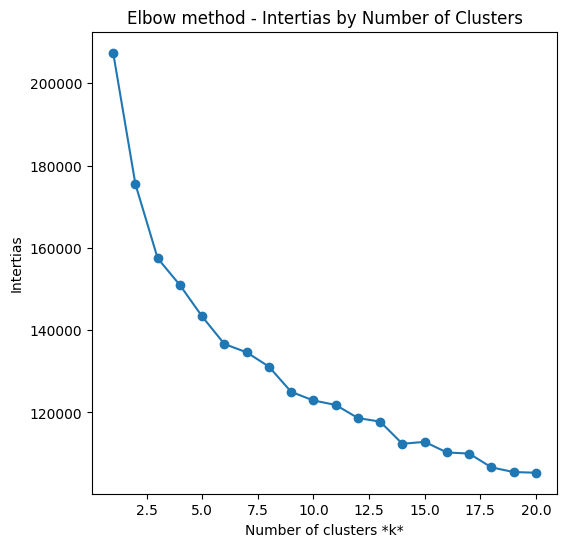

In [16]:
#Identify the inertias for different number of clusters
inertias = []
for i in range(1, 21): # 1 to 20 clusters
    kmeans = KMeans(n_clusters = i, n_init='auto').fit(components)
    inertias.append(kmeans.inertia_)

#Plot the inertias for different number of clusters to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(1,21), inertias, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Intertias')
plt.title('Elbow method - Intertias by Number of Clusters')
plt.show()

# There isn't a clear elbow to help identify the number of clusters. So we can use the percent differential scheme to identify how many clusters to choose.

In [17]:
#Build a plotly express plot to show the percent differential in inertia for different number of clusters
diff = np.diff(inertias) / inertias[:-1] * 100
import plotly.express as px
fig = px.line(x=range(1,20), y=diff, title='Percent differential in Intertia for Different Number of Clusters')
fig.update_xaxes(title_text='Number of clusters')
fig.update_yaxes(title_text='Percent differential in Inertia')
fig.show()

### KneeLocator

In [20]:
pip install kneed
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex",direction="decreasing")
kl.elbow

SyntaxError: invalid syntax (<ipython-input-20-ad0f1d18e1f3>, line 1)

### Silhouette coefficient

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_coefficients = []
for k in range(2, 21):
  kmeans = KMeans(n_clusters = i, n_init='auto').fit(components)
  score = silhouette_score(components, kmeans.labels_)
  silhouette_coefficients.append(score)


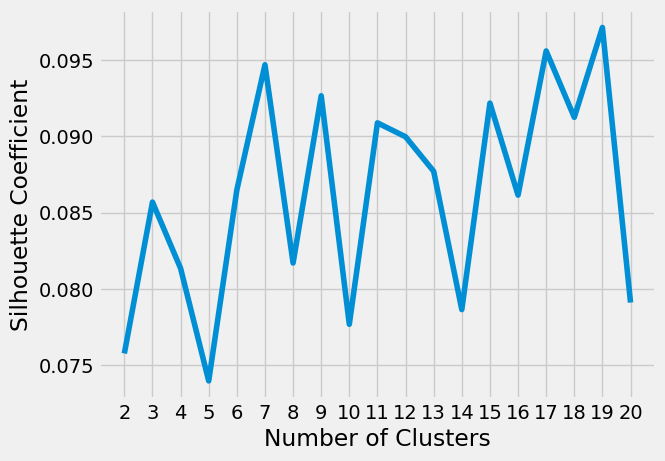

In [33]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()